# Regression Analysis

We will be using **ISTANBUL STOCK EXCHANGE** dataset to perform regression analysis. The dataset is available at https://www.kaggle.com/uciml/istanbul-stock-exchange#istanbul_stock_exchange.csv

**Import necessary libraries**

In [2]:
# import libraries
import math
import copy
import scipy
import operator
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from prettytable import PrettyTable 
from sklearn.model_selection import cross_val_score
from statsmodels.regression.linear_model import OLS
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import matplotlib.pyplot as figure
%matplotlib inline

---
**Read the dataset**

In [3]:
# read the dataset
istanbul_df = pd.read_csv('data/istanbul_stock_exchange.csv', sep = ',')

# list the attributes of dataset with their datatypes
print(istanbul_df.dtypes)

date              object
TL_BASED_ISE     float64
USD_BASED_ISE    float64
SP               float64
DAX              float64
FTSE             float64
NIKKEI           float64
BOVESPA          float64
EU               float64
EM               float64
dtype: object


Note that **_TL BASED ISE_**, **_USD BASED ISE_** are response variables and _**SP**_, **_DAX_**, **_FTSE_**, **_NIKKEI_**, **_BOVESPA_**, _**EU**_, _**EM**_ are predictor variables.

---
**Summary Statistics**

In [4]:
# print summary statistics of dataset
print(istanbul_df.describe())

       TL_BASED_ISE  USD_BASED_ISE          SP         DAX        FTSE  \
count    536.000000     536.000000  536.000000  536.000000  536.000000   
mean       0.001629       0.001552    0.000643    0.000721    0.000510   
std        0.016264       0.021122    0.014093    0.014557    0.012656   
min       -0.062208      -0.084716   -0.054262   -0.052331   -0.054816   
25%       -0.006669      -0.009753   -0.004675   -0.006212   -0.005808   
50%        0.002189       0.002643    0.000876    0.000887    0.000409   
75%        0.010584       0.013809    0.006706    0.008224    0.007428   
max        0.068952       0.100621    0.068366    0.058951    0.050323   

           NIKKEI     BOVESPA          EU          EM  
count  536.000000  536.000000  536.000000  536.000000  
mean     0.000308    0.000935    0.000471    0.000936  
std      0.014850    0.015751    0.012990    0.010501  
min     -0.050448   -0.053849   -0.048817   -0.038564  
25%     -0.007407   -0.007215   -0.005952   -0.004911

---
**Split attribute _'date'_ to _'day'_, _'month'_ and _'year'_**

In [5]:
# create a copy of the dataset
istanbul_df_copy = istanbul_df.copy(deep = True)

# create 'day', 'month' and 'year'
istanbul_df_copy[['day', 'month', 'year']] = istanbul_df_copy['date'].str.split('-', expand = True)

# delete 'date' column
del istanbul_df_copy['date']

# convert 'day' and 'year' to 'int' format
istanbul_df_copy[['day', 'year']] = istanbul_df_copy[['day', 'year']].astype(int)

# print sample dataset 
print(istanbul_df_copy.head())

   TL_BASED_ISE  USD_BASED_ISE        SP       DAX      FTSE    NIKKEI  \
0      0.035754       0.038376 -0.004679  0.002193  0.003894  0.000000   
1      0.025426       0.031813  0.007787  0.008455  0.012866  0.004162   
2     -0.028862      -0.026353 -0.030469 -0.017833 -0.028735  0.017293   
3     -0.062208      -0.084716  0.003391 -0.011726 -0.000466 -0.040061   
4      0.009860       0.009658 -0.021533 -0.019873 -0.012710 -0.004474   

    BOVESPA        EU        EM  day month  year  
0  0.031190  0.012698  0.028524    5   Jan     9  
1  0.018920  0.011341  0.008773    6   Jan     9  
2 -0.035899 -0.017073 -0.020015    7   Jan     9  
3  0.028283 -0.005561 -0.019424    8   Jan     9  
4 -0.009764 -0.010989 -0.007802    9   Jan     9  


---
## 1. Exploratory Data Analysis (EDA)

Let's look at data distribution of predictor variables by plotting histograms

In [6]:
# create a list of predictors
predictors = ['SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU', 'EM']

# list of months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] 

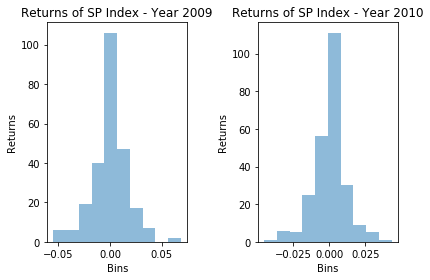

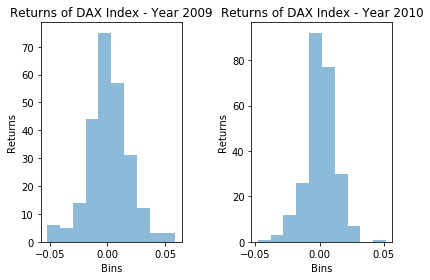

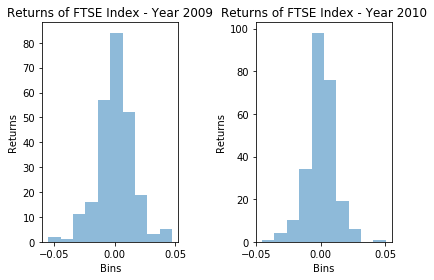

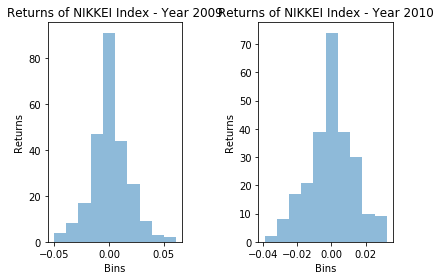

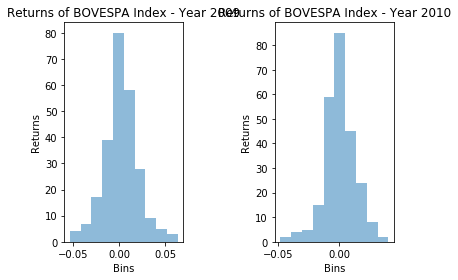

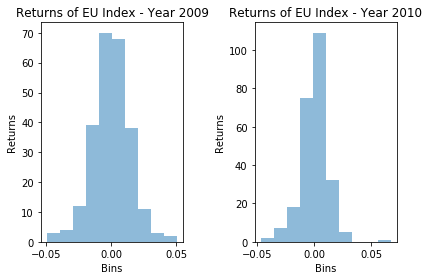

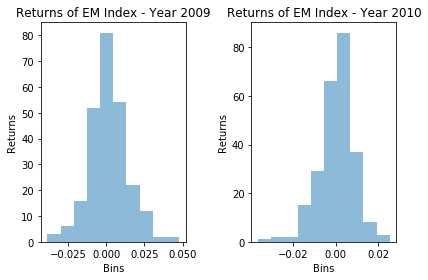

In [7]:
# plot histogram fo returns for year 2009, 2010
for pred in predictors:
    
    plt.subplot(1,2,1)
    plt.hist(istanbul_df_copy[istanbul_df_copy.year == 9][pred], alpha = 0.5)
    plt.xlabel('Bins')
    plt.ylabel('Returns')
    title_str = 'Returns of ' + pred + ' Index - Year 2009'
    plt.title(title_str)

    plt.subplot(1,2,2)
    plt.hist(istanbul_df_copy[istanbul_df_copy.year == 10][pred], alpha = 0.5)
    plt.xlabel('Bins')
    plt.ylabel('Returns')
    title_str = 'Returns of ' + pred + ' Index - Year 2010'
    plt.title(title_str)
     
    plt.tight_layout()
    plt.show()

It can be seen that returns of every stock index for year 2009 & 2010 follow normal distribution (almost) centered at zero mean.

Let's look at average return of every stock index per year. Let's plot a bar diagram that compares average returns of every stock index for year 2009 and 2010. 

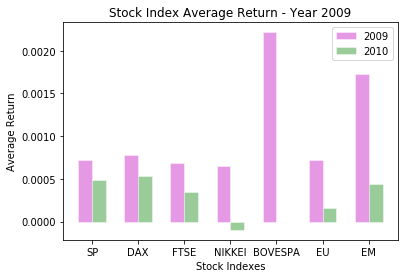

In [8]:
# for year 2009
year_2009 = istanbul_df_copy.loc[istanbul_df_copy.year == 9]
avg_returns_2009 = [np.average(year_2009[pred]) for pred in predictors]

# for year 2010
year_2010 = istanbul_df_copy.loc[istanbul_df_copy.year == 10]
avg_returns_2010 = [np.average(year_2010[pred]) for pred in predictors]

# Grouped bar plot
# https://python-graph-gallery.com/11-grouped-barplot/
bar_width = 0.3
width_2009 = list(np.arange(len(avg_returns_2009)))
width_2010 = [i+bar_width for i in width_2009]

plt.bar(x = width_2009, 
        height = avg_returns_2009, 
        width = bar_width, 
        edgecolor = 'white', 
        color = 'm', 
        alpha = 0.4,
        label = '2009')
plt.bar(x = width_2010, 
        height = avg_returns_2010, 
        width = bar_width, 
        edgecolor = 'white', 
        color = 'g', 
        alpha = 0.4,
        label = '2010')

plt.xlabel('Stock Indexes')
plt.xticks([i+bar_width/2 for i in range(len(predictors))], predictors)
plt.ylabel('Average Return')
plt.title('Stock Index Average Return - Year 2009')
plt.legend(loc = 'upper right') 
plt.show()

It can be seen that in year 2009, stock index **BOVESPA** had high average return followed by stock index **EM**, whilst **NIKKEI** performed poorly. In the year 2010, **DAX** performed better, whilst **NIKKEI** had negative returns. Also, average returns on all stock indexes were higher in 2009 in comparison to 2010.

---
## 2. Multiple Linear Regression

To understand **Multiple Linear Regression**, we will be using all predictor variables from the dataset and **USD_BASED_ISE** as our response variable.

To build and test simple linear regression model, we need to split the dataset into train and test sets. As the data for year 2011 constitutes only 37 data points out of 537 data points, we will use data points for the year 2011 as our test set whilst data points for the years 2009 and 2010 will be used for training the model.

In [9]:
# Split the data into train and test sets
train = istanbul_df_copy.loc[istanbul_df_copy.year != 11].reset_index(drop = True)
train = train.sample(frac = 1, random_state = 123).reset_index(drop = True)

test = istanbul_df_copy.loc[istanbul_df_copy.year == 11].reset_index(drop = True)
test = test.sample(frac = 1, random_state = 123).reset_index(drop = True)

X_train = train[['SP','DAX','FTSE','NIKKEI','BOVESPA','EU','EM']]
y_train = train['USD_BASED_ISE']
 
X_test = test[['SP','DAX','FTSE','NIKKEI','BOVESPA','EU','EM']]
y_test = test['USD_BASED_ISE']

---
#### Data Visualization
Let's visualize how individual predictors and response are related

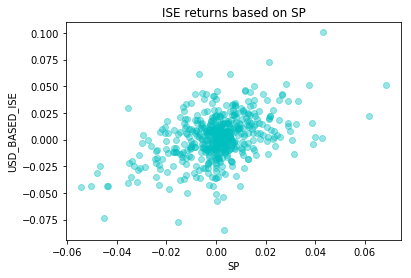

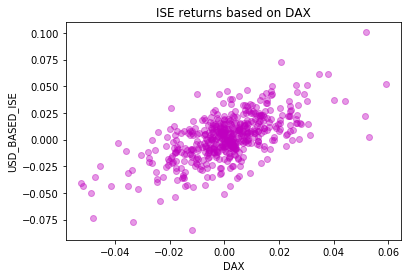

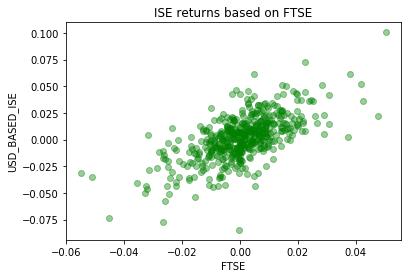

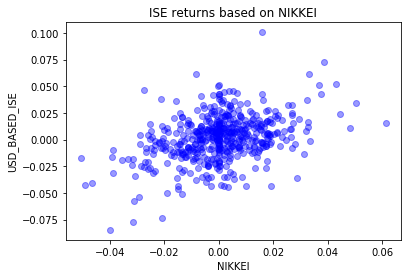

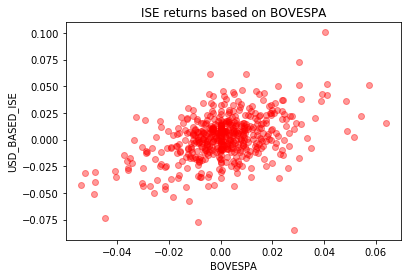

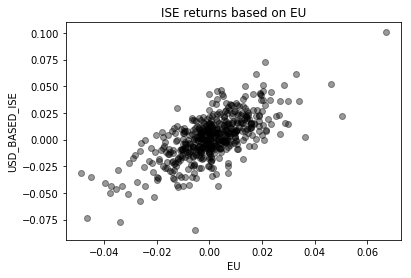

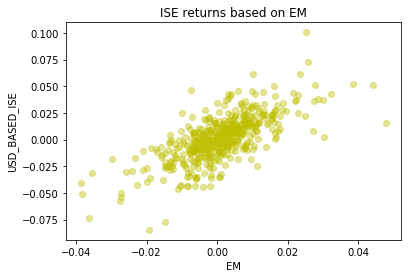

In [10]:
predictors = list(X_train.columns)
colors = ['c', 'm', 'g', 'b', 'r', 'k', 'y']
response = 'USD_BASED_ISE'

for i in range(len(predictors)):
    plt.plot(X_train[predictors[i]], y_train, colors[i] + 'o' ,alpha = 0.4)
    plt.xlabel(predictors[i])
    plt.ylabel(response)
    title_str = 'ISE returns based on ' + predictors[i]
    plt.title(title_str)
    plt.show()

---
### Correlation Analysis & Principal Component Regression (PCR)

Let's calculate corrleation coefficients among different predictor variables to verify if correlation exists between predictor variables.

In [11]:
# calculate correlation between variables
corr = X_train.corr()
print(corr)

               SP       DAX      FTSE    NIKKEI   BOVESPA        EU        EM
SP       1.000000  0.685779  0.656964  0.132566  0.726820  0.687021  0.533671
DAX      0.685779  1.000000  0.870626  0.259809  0.591447  0.937188  0.671541
FTSE     0.656964  0.870626  1.000000  0.255006  0.598704  0.950795  0.692595
NIKKEI   0.132566  0.259809  0.255006  1.000000  0.176984  0.285255  0.552616
BOVESPA  0.726820  0.591447  0.598704  0.176984  1.000000  0.625087  0.691877
EU       0.687021  0.937188  0.950795  0.285255  0.625087  1.000000  0.721829
EM       0.533671  0.671541  0.692595  0.552616  0.691877  0.721829  1.000000


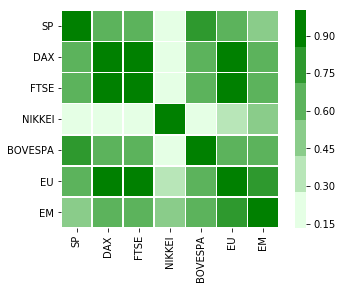

In [12]:
# plotting correlation heatmap using seaborn
ax = sns.heatmap(corr, cmap = sns.light_palette("green"), square = True, linewidths = .6)

Observation that can be made from correlation matrix/heatmap are:
1. **EU** is correlated with **DAX** and **FTSE**. This behavior can be explained as **EU**, **FTSE** and **DAX** all operate in European Union.
2. Correlation exists between **SP** and **BOVESPA** index
3. **EM** which stands for _Emerging Markets_ index is correlated with **EU**, **FTSE**, **DAX** and **BOVESPA**
4. **NIKKEI** exhibits least correlation among all the predictor variables

---
#### Principal Component Analysis (PCA)

We have seen in the above correlation heatmap that there exists correlation among different predictor variables. Using PCA we obtain _principal components_ that are linearly uncorrelated and we can also reduce dimensionality of data.

In [13]:
# compute covariance matrix of training data
cov_matrix = np.cov(np.transpose(X_train))

# perform eigen decomposition
eigen = np.linalg.eig(cov_matrix)

# print eigen values and vectors
eigen_vals = eigen[0]
eigen_vectors = eigen[1]

It can be seen that
1. The 1st principal component explains 65% variance 
2. First 2 principal components explain 81.6% variance
3. First 3 explain 91.5% variance and so on

---
#### Crossvalidation on Principal Components 

In [14]:
# let's perform CV on principal components and compute average MSE using Scikit Learn
x = PrettyTable()
x.field_names = ['principal components', 'average MSE']
avg_MSE = []

for i in range(1, cov_matrix.shape[0] + 1):
        
    temp = [i]    
        
    # fetch principal components
    principal_components = cov_matrix[:,:i]
    
    # transform training data using principal components
    X_train_modif = np.matmul(X_train, principal_components)
    
    # prepare the data for linear regression and instantiate the classifier
    lreg = LinearRegression()    
    cv_score = cross_val_score(lreg, X_train_modif, y_train, scoring = 'neg_mean_squared_error', cv = 5)
    temp.append(np.abs(np.average(cv_score)))
    x.add_row(temp)

    # for graphing purposes
    avg_MSE.append(1 - np.average(cv_score))
    
# print prettytable
print(x)

+----------------------+------------------------+
| principal components |      average MSE       |
+----------------------+------------------------+
|          1           | 0.00026516251603415843 |
|          2           | 0.0002282864397038461  |
|          3           | 0.00022616701126678987 |
|          4           | 0.00022349967019684078 |
|          5           | 0.0002254940641616993  |
|          6           | 0.0002121826511821316  |
|          7           | 0.00020023116377548069 |
+----------------------+------------------------+


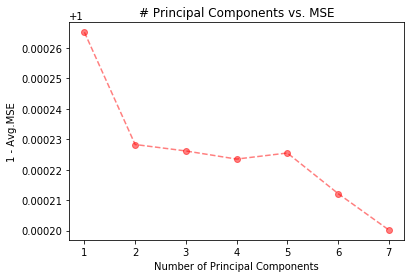

In [15]:
plt.plot(np.arange(1, cov_matrix.shape[0] + 1), avg_MSE, 'ro--', alpha = 0.5)
plt.xlabel('Number of Principal Components')
plt.ylabel('1 - Avg.MSE')
plt.title('# Principal Components vs. MSE')
plt.show()

---
#### Analysis

It can be seen that #components = 7 has the least MSE. But choosing all the predictors is equivalent as working with entirety of predictors. On the other hand, #components = 2 is a reasonable option as there is a sharp drop in MSE from #components = 1 to 2

---
#### Principal Component Regression (PCR) on Istanbul Stock Exchange Dataset (using 2 principal components)

In [16]:
# fit the model on training set
X_train_modif = np.matmul(X_train, eigen_vectors[:,:2]) 
X_train_modif = sm.add_constant(X_train_modif)

# coefficients, training R^2, t-statistic, p-value and confidence interval
ols = sm.OLS(y_train, X_train_modif)
model = ols.fit()   

# print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          USD_BASED_ISE   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     251.9
Date:                Sun, 07 Oct 2018   Prob (F-statistic):           3.11e-76
Time:                        16:03:37   Log-Likelihood:                 1384.7
No. Observations:                 499   AIC:                            -2763.
Df Residuals:                     496   BIC:                            -2751.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.001      1.323      0.1

As _p-value_ for $\beta_{1}$ and $\beta_{2}$ (shown as $x_{1}$ and $x_{2}$) is below $\alpha$ = 0.05, the coefficients have some relationship to **USD_BASED_ISE** which is the response variable under consideration.

In [17]:
# perform prediction on test set
X_test_modif = np.matmul(X_test, eigen_vectors[:,:2])
X_test_modif = sm.add_constant(X_test_modif)

y_test_pred = model.predict(X_test_modif)

# R^2 score
test_r2_score = r2_score(y_test, y_test_pred)

# Adjusted R^2 score
numerator = (1 - test_r2_score) * (y_test_pred.shape[0] - 1)
denominator = (y_test_pred.shape[0] - 2 - 1)
test_adj_r2_score = 1 - (numerator / denominator)

print('Test set R^2 score:', test_r2_score)
print('Test set adjusted R^2 score:', test_adj_r2_score)

Test set R^2 score: 0.4719125901132746
Test set adjusted R^2 score: 0.4408486248258201
